In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import sys
sys.path.append('../../day_16/src')
from eda_toolkit import generate_numeric_summary, generate_relationship_analysis, generate_categorical_analysis

df_segments = pd.read_csv('../data/customer_segments.csv')
df_segments.head()

,customer_id,avg_purchase_amount,purchase_frequency_per_month,avg_basket_size,premium_product_ratio
0,1,27.52,13,21.5,0.100
1,2,140.38,19,11.8,0.557
2,3,239.80,5,5.1,0.859
3,4,45.36,11,29.6,0.118
4,5,31.40,10,23.3,0.250


{'heatmap': <Figure size 1000x800 with 2 Axes>,
 'pairplot': <Figure size 1000x1000 with 20 Axes>,
 'top_correlations': [('avg_purchase_amount',
   'premium_product_ratio',
   np.float64(0.8376106676284153)),
  ('premium_product_ratio',
   'avg_purchase_amount',
   np.float64(0.8376106676284153)),
  ('avg_basket_size', 'premium_product_ratio', np.float64(-0.832024040774389)),
  ('premium_product_ratio', 'avg_basket_size', np.float64(-0.832024040774389)),
  ('avg_purchase_amount', 'avg_basket_size', np.float64(-0.7739404574036225))]}

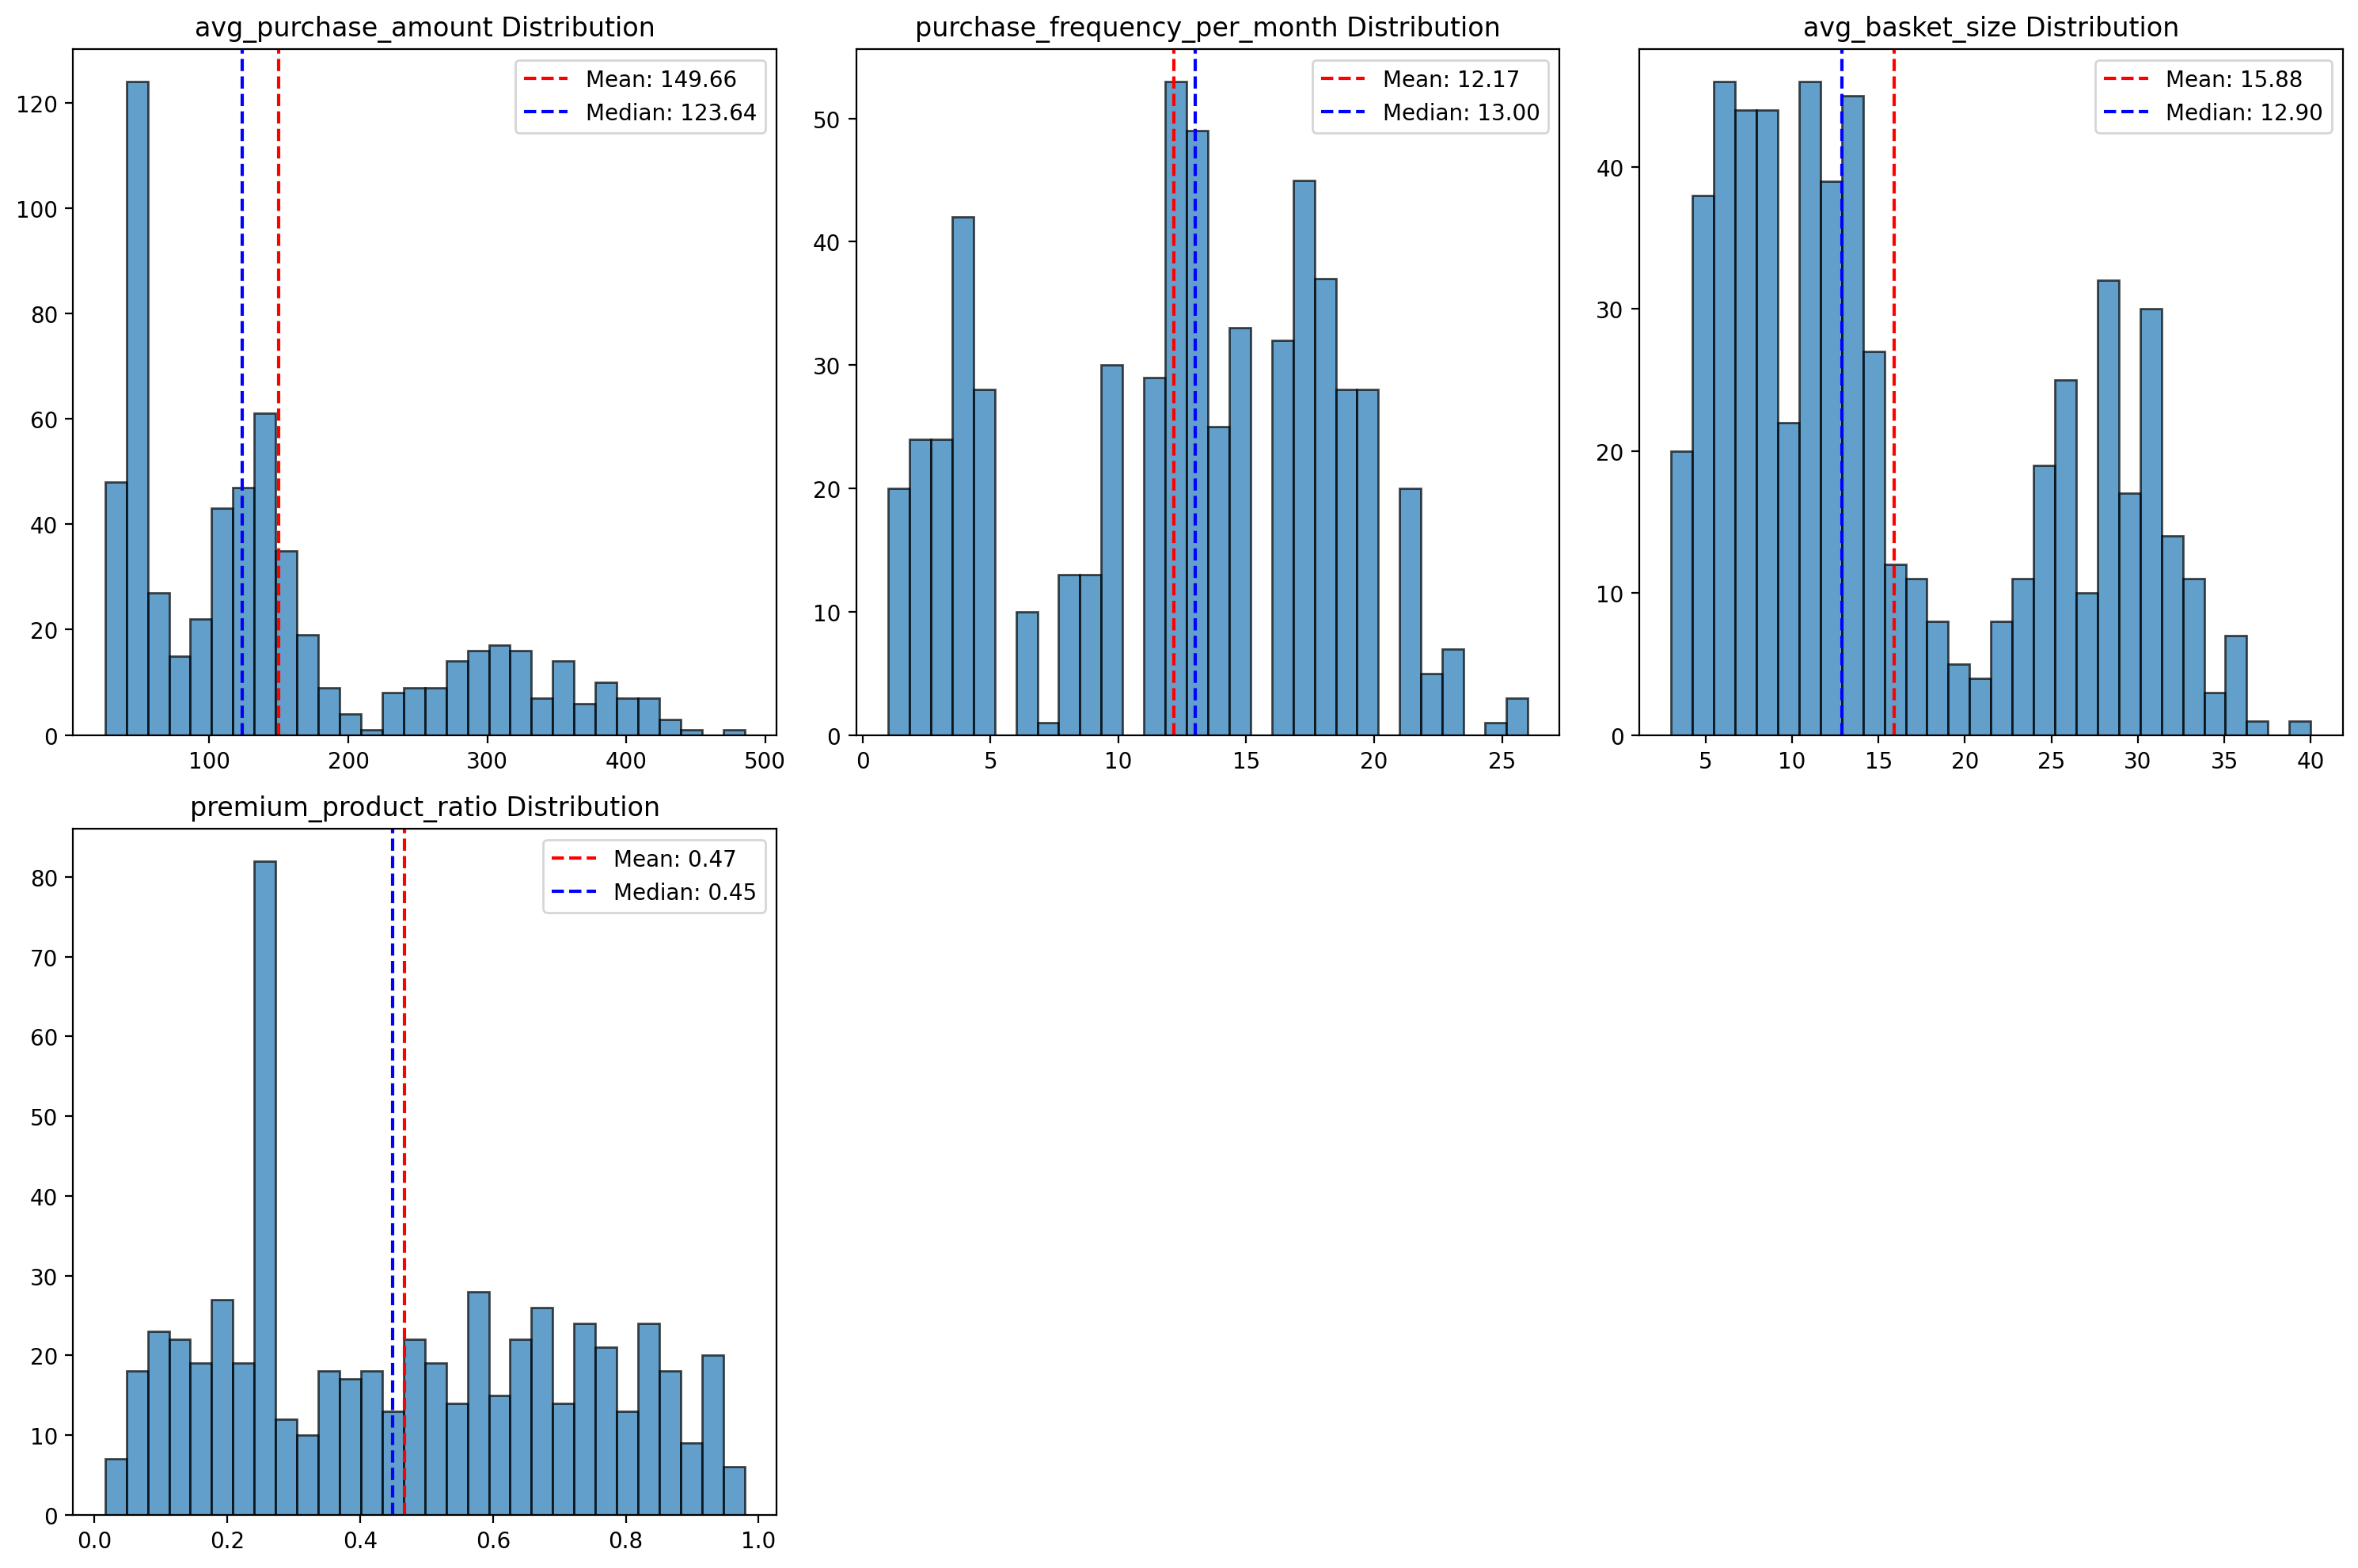

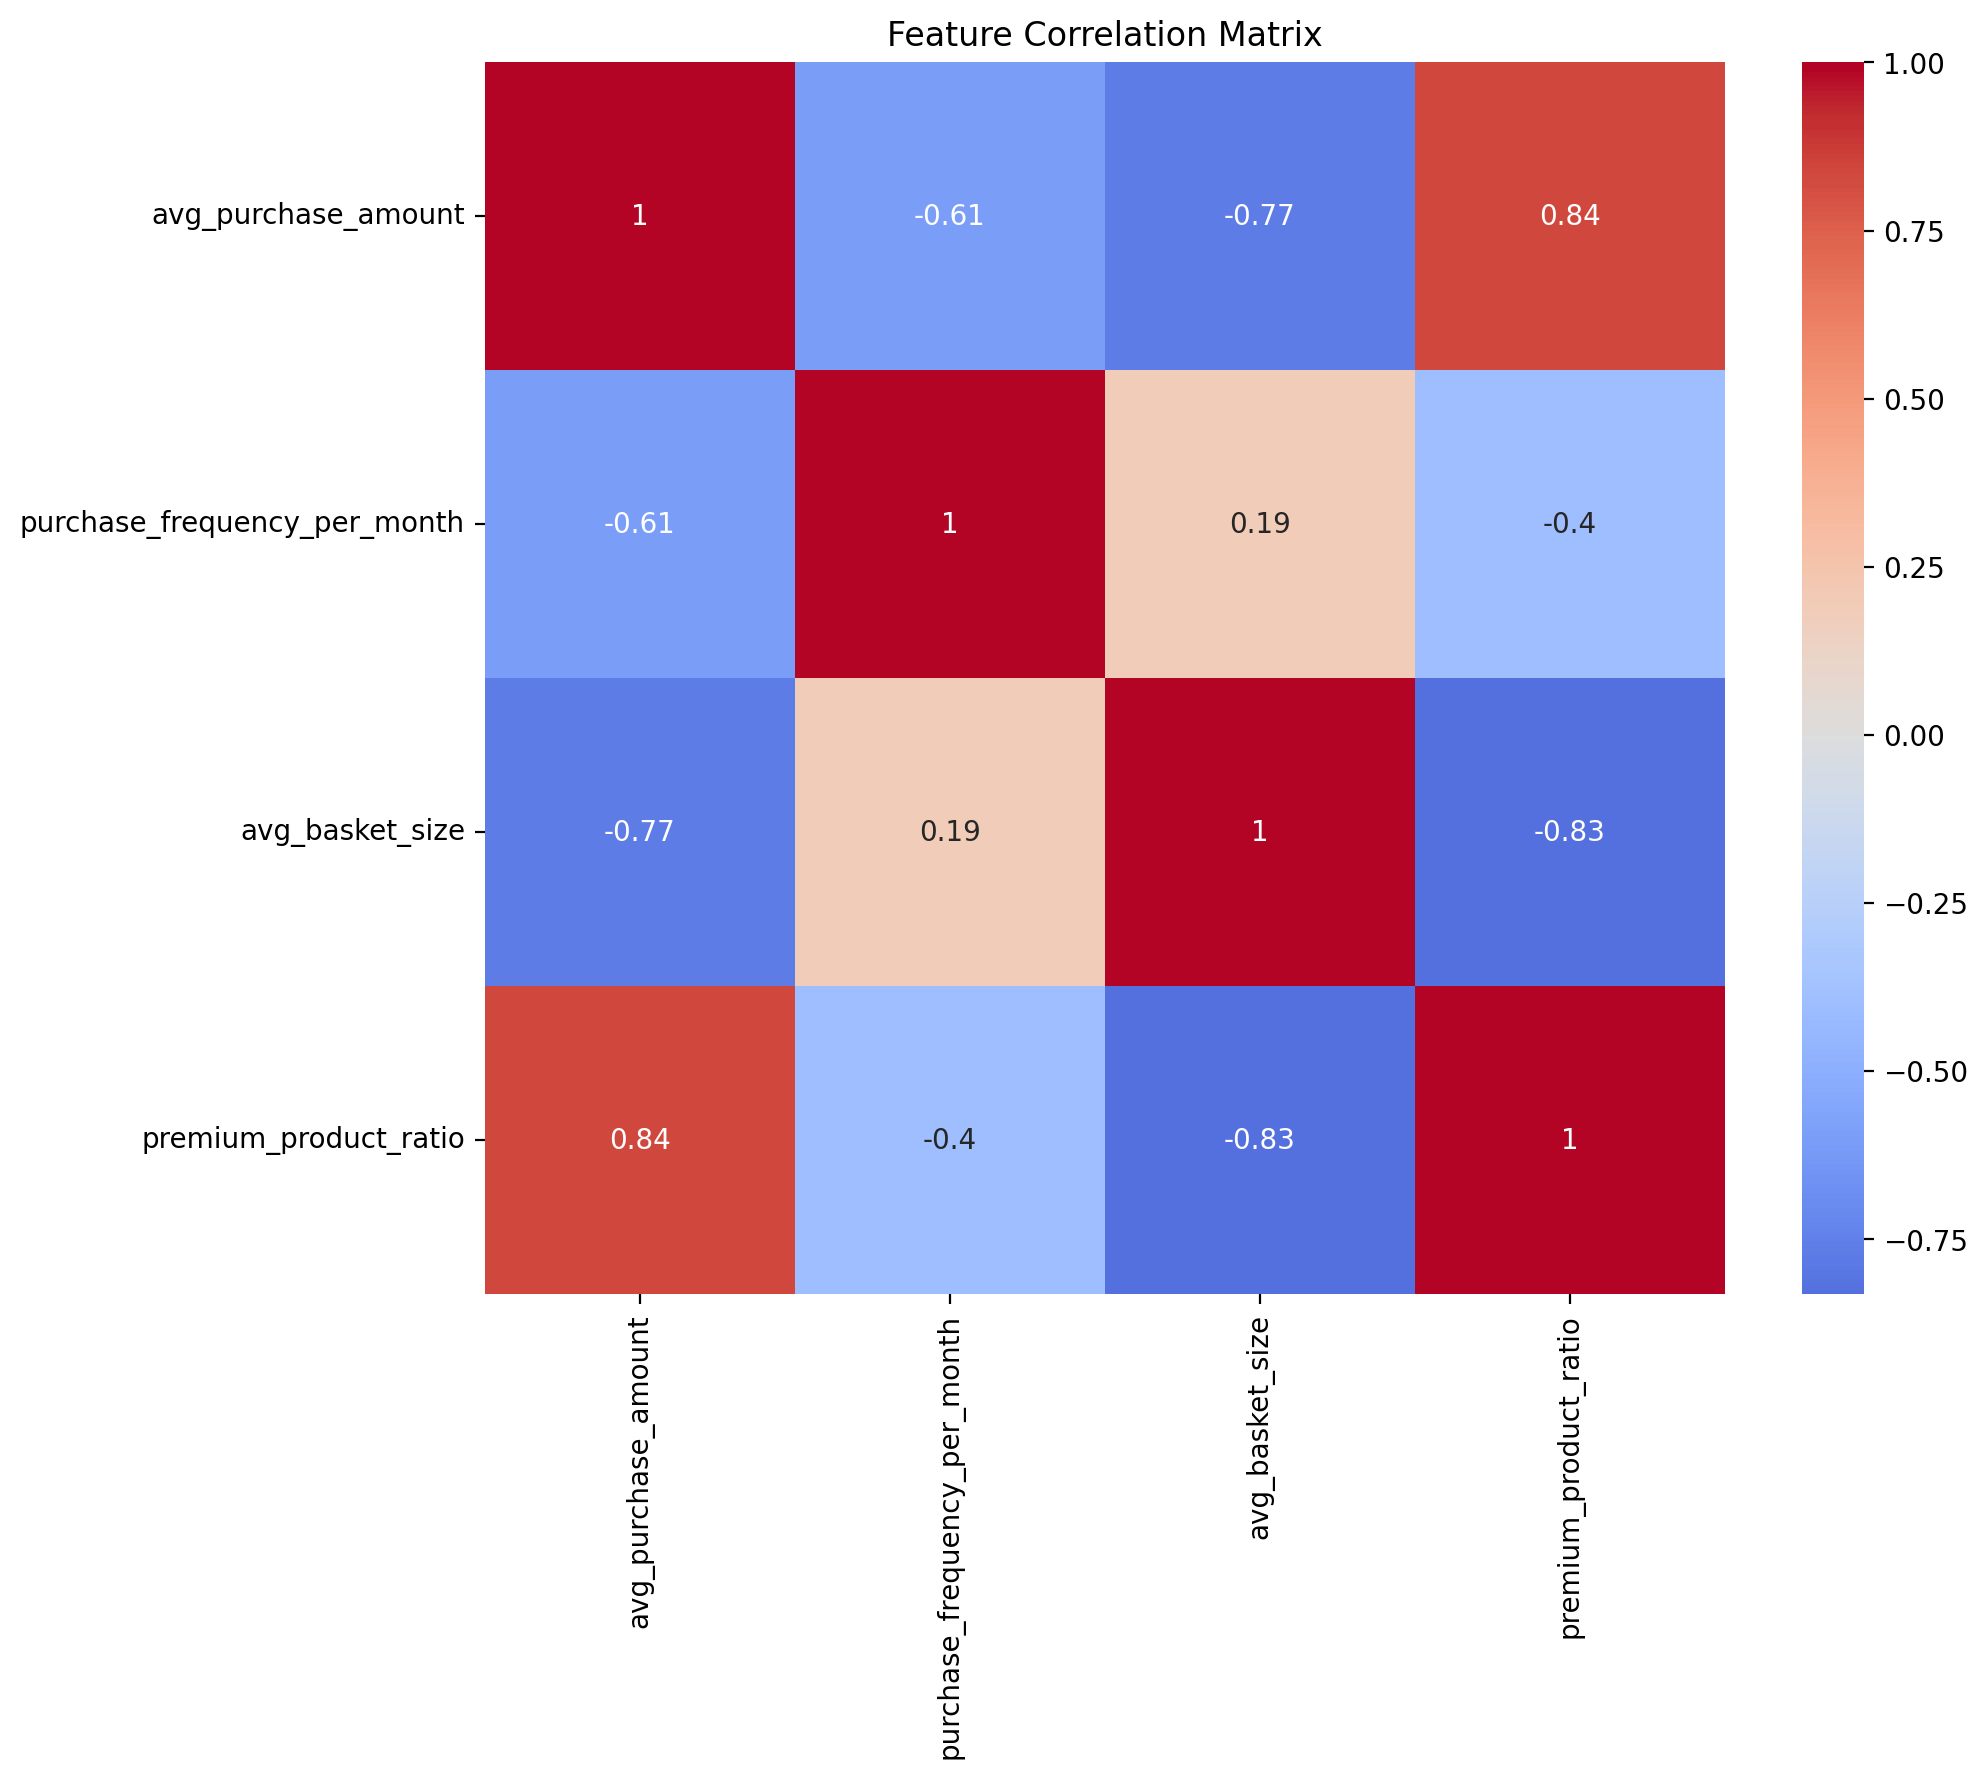

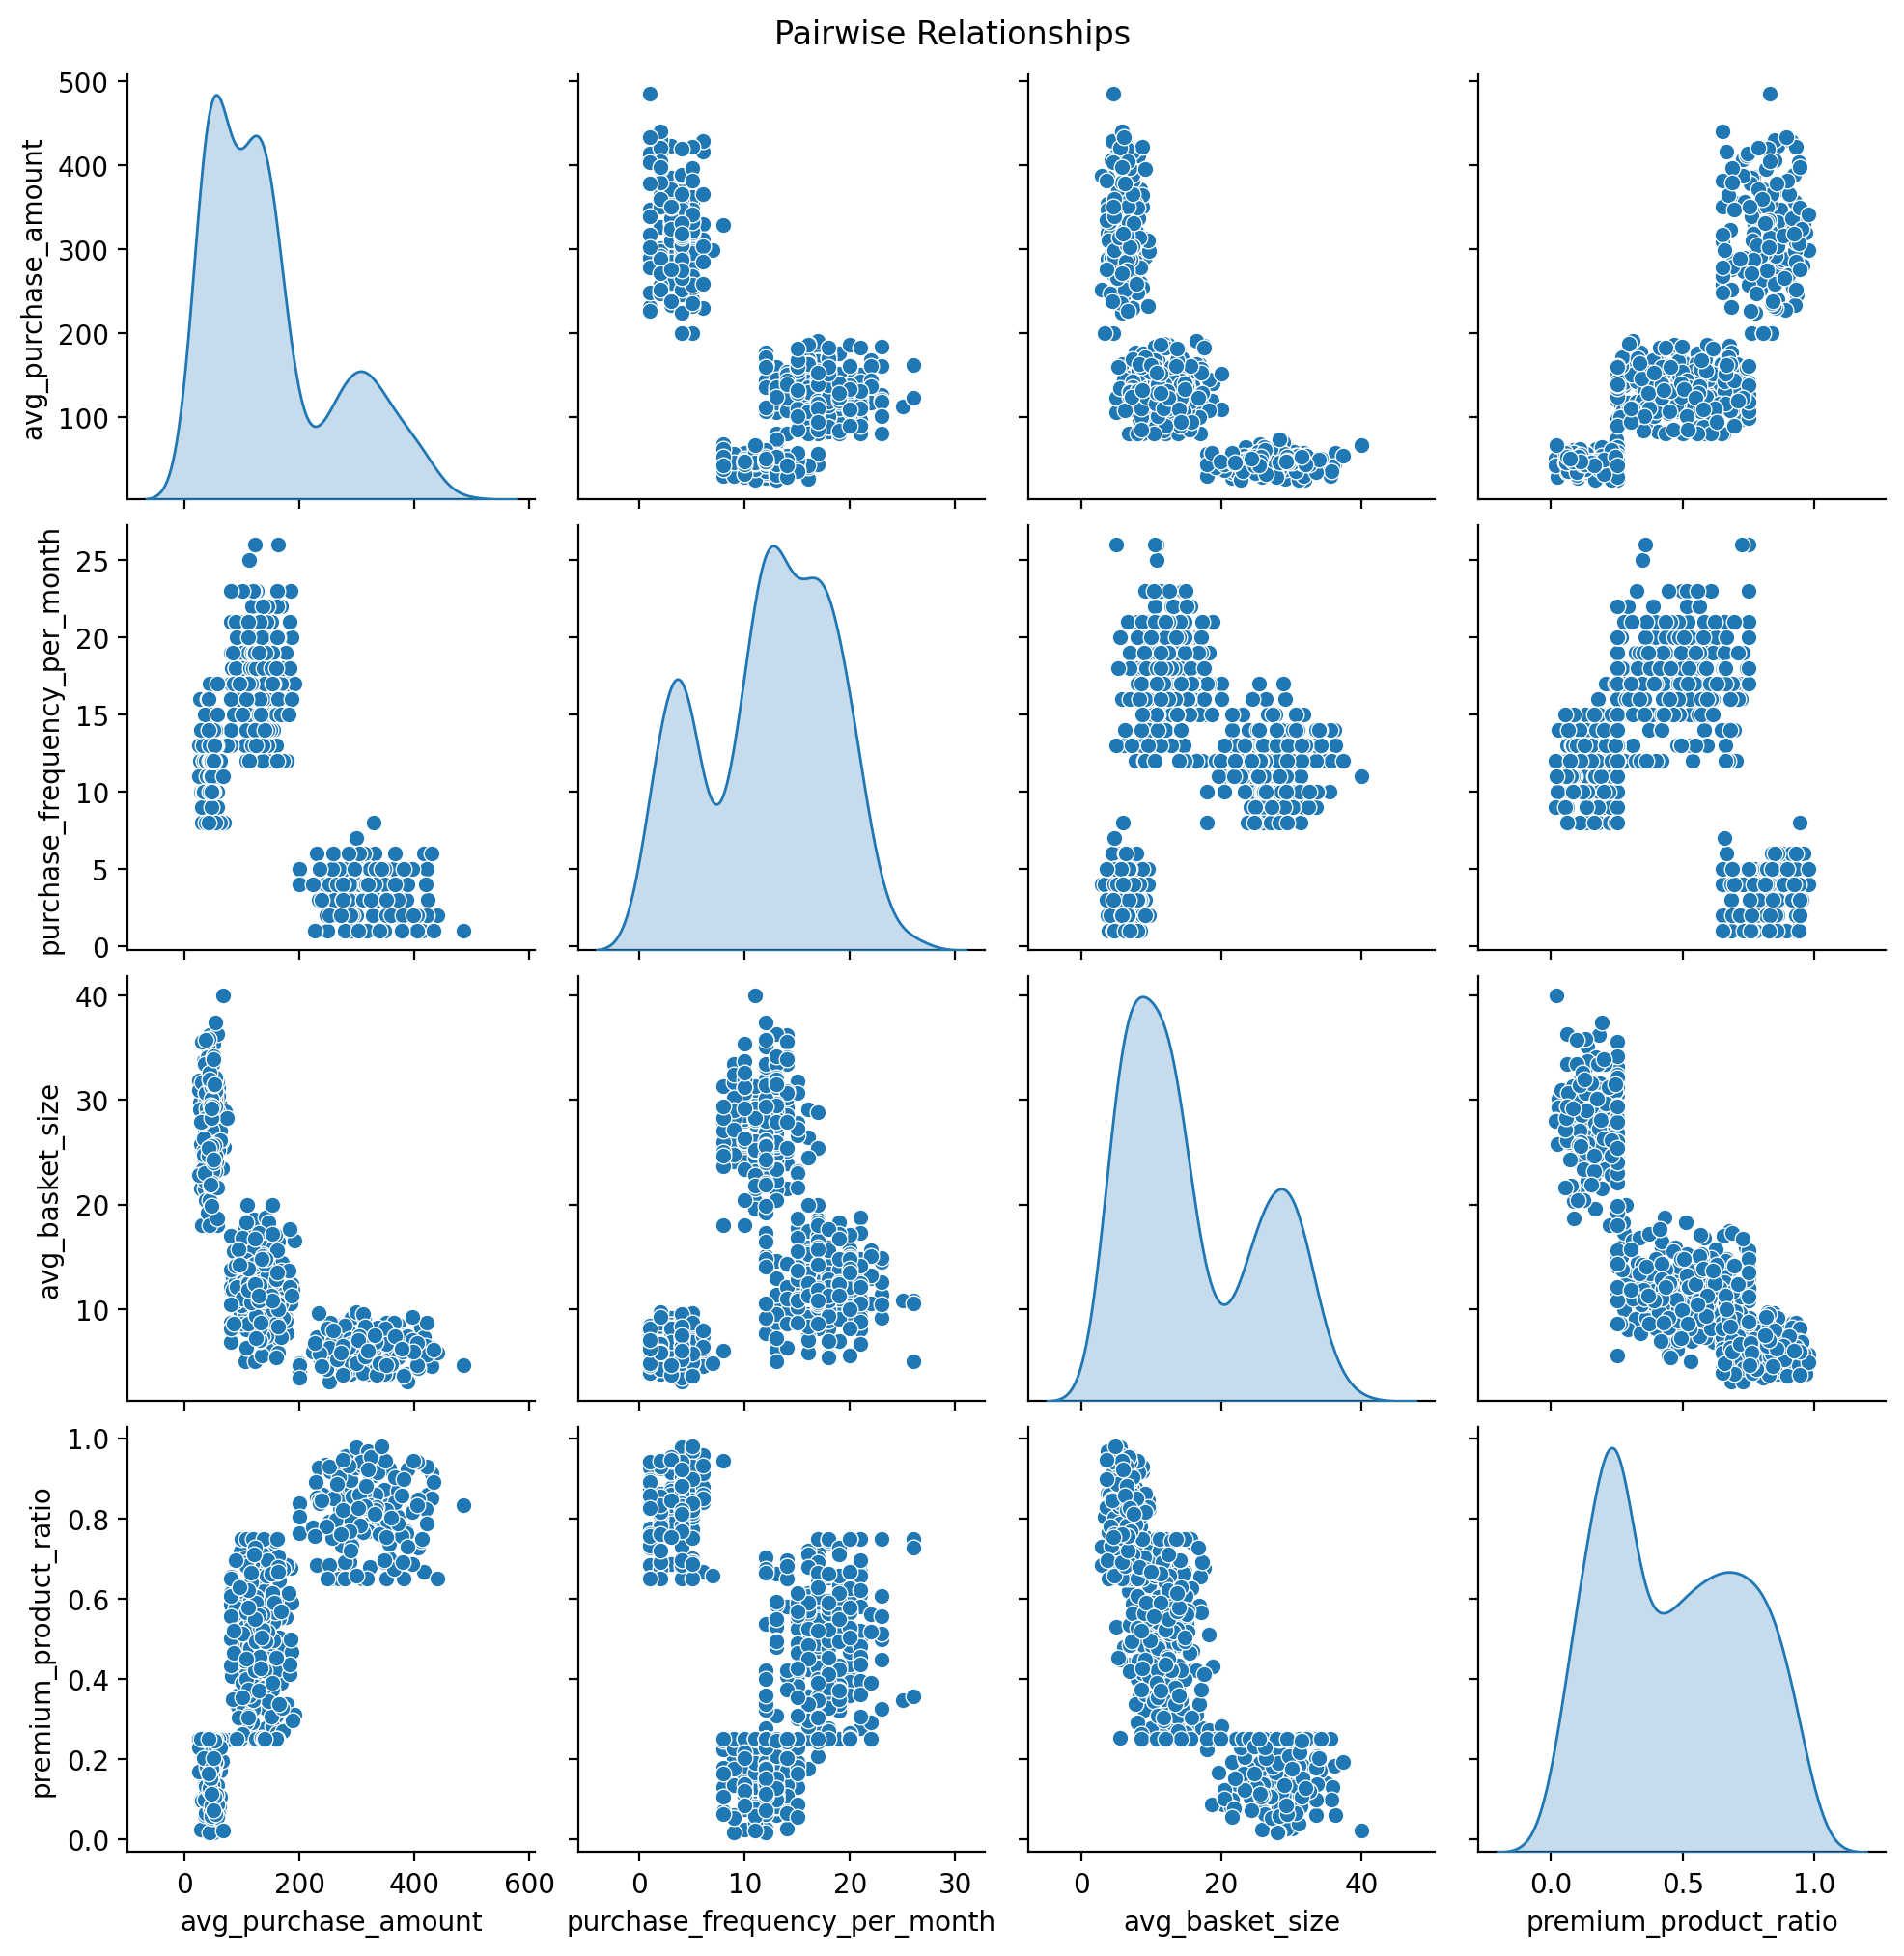

In [2]:
generate_numeric_summary(df_segments)
generate_relationship_analysis(df_segments)

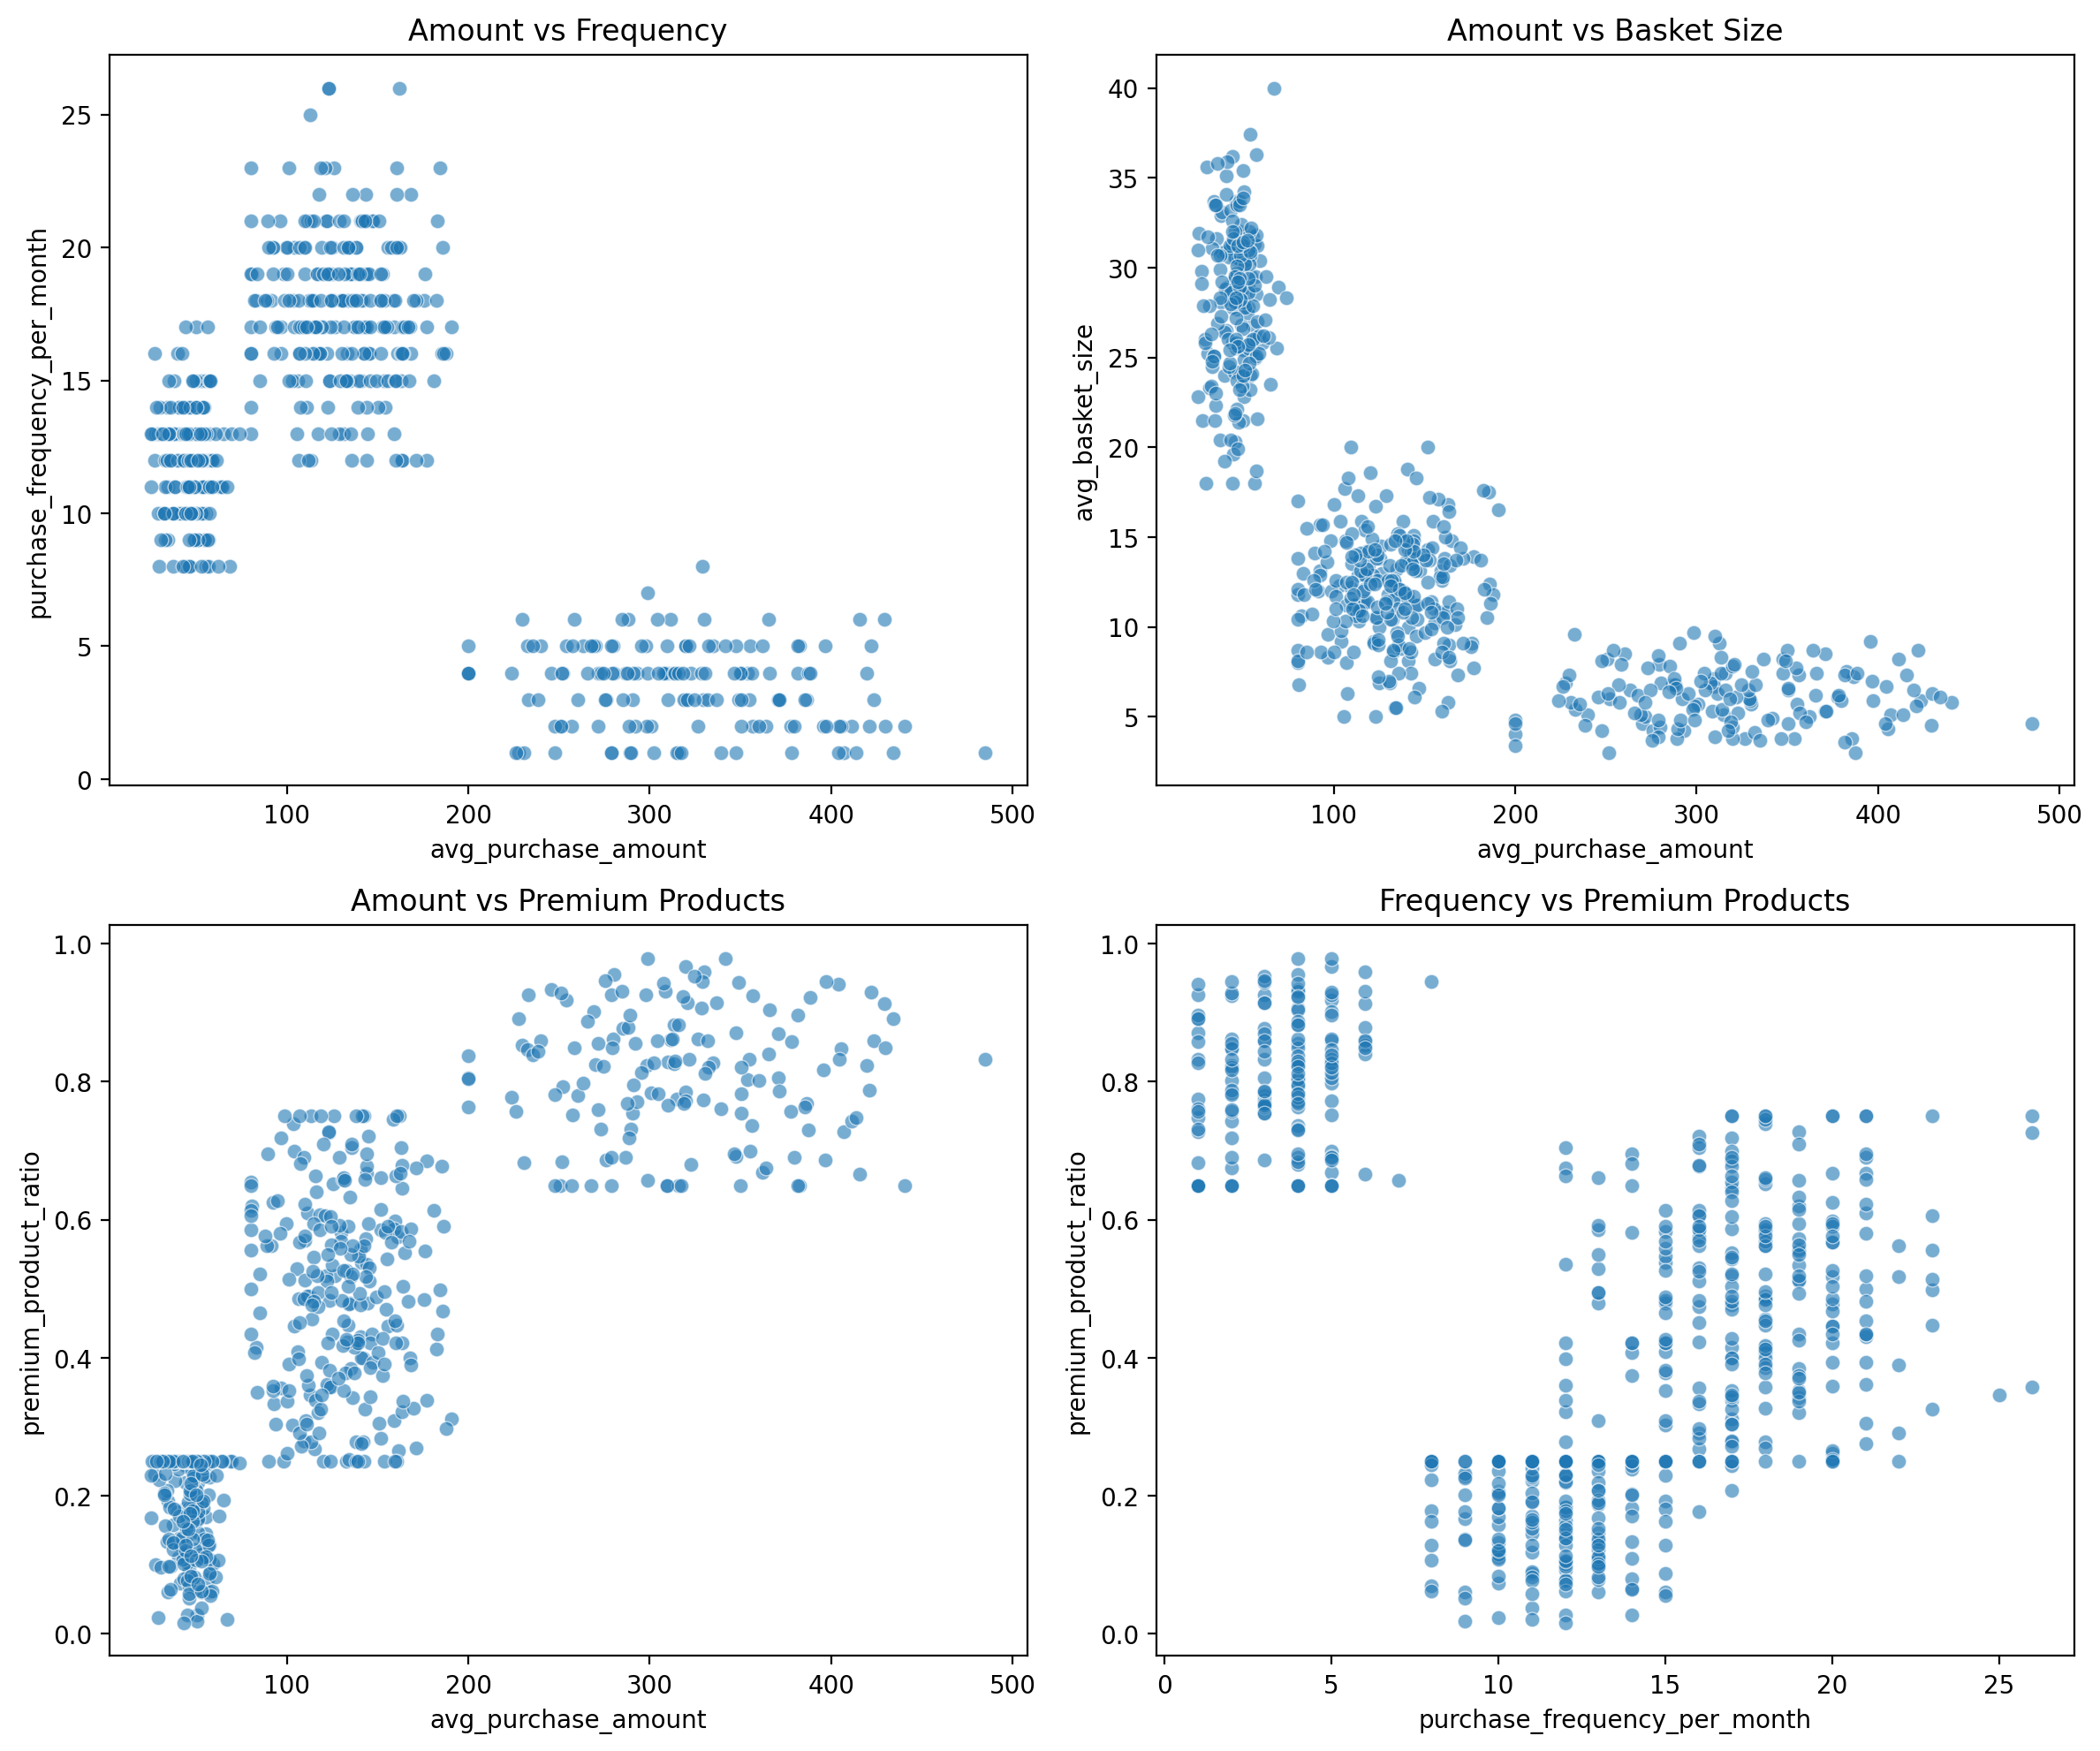

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Any

# Check other relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Amount vs Frequency (you already saw this)
sns.scatterplot(data=df_segments, x='avg_purchase_amount', 
                y='purchase_frequency_per_month', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Amount vs Frequency')

# Plot 2: Amount vs Basket Size
sns.scatterplot(data=df_segments, x='avg_purchase_amount', 
                y='avg_basket_size', alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Amount vs Basket Size')

# Plot 3: Amount vs Premium Ratio
sns.scatterplot(data=df_segments, x='avg_purchase_amount', 
                y='premium_product_ratio', alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Amount vs Premium Products')

# Plot 4: Frequency vs Premium Ratio
sns.scatterplot(data=df_segments, x='purchase_frequency_per_month', 
                y='premium_product_ratio', alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Frequency vs Premium Products')

plt.tight_layout()
plt.show()

In [8]:
"""
PROBLEM FORMULATION: Customer Segmentation

1. PROBLEM TYPE: Clustering (Unsupervised Learning)
   - No target variable
   - Goal: Find natural customer groups
   
2. EXPECTED CLUSTERS: 3 distinct segments visible
   
   Segment 1 (Luxury): 
     - High spend (~$300), low frequency (~4/mo)
     - Small baskets, premium products
     
   Segment 2 (Professionals):
     - Medium spend (~$130), very high frequency (~18/mo)
     - Small baskets, convenience shopping
     
   Segment 3 (Budget Families):
     - Low spend (~$45), medium frequency (~12/mo)
     - Large baskets, value-focused
   
3. RECOMMENDED METRICS:
   Primary: Silhouette Score
     - Measures cluster separation quality
     - Range: -1 to 1, higher better
   
   Secondary: Business interpretation
     - Do segments make sense?
     - Can we action on them (different marketing)?
   
   Visual: Scatter plots
     - Are clusters visually distinct?
     
4. VALIDATION STRATEGY:
   - No traditional train/test split needed
   - Could hold out data to test if new customers fit segments
   - Main validation: does it help the business?
   
5. USE CASE:
   - Targeted marketing campaigns per segment
   - Personalized product recommendations
   - Inventory planning by customer type
"""

'\nPROBLEM FORMULATION: Customer Segmentation\n\n1. PROBLEM TYPE: Clustering (Unsupervised Learning)\n   - No target variable\n   - Goal: Find natural customer groups\n\n2. EXPECTED CLUSTERS: 3 distinct segments visible\n\n   Segment 1 (Luxury): \n     - High spend (~$300), low frequency (~4/mo)\n     - Small baskets, premium products\n\n   Segment 2 (Professionals):\n     - Medium spend (~$130), very high frequency (~18/mo)\n     - Small baskets, convenience shopping\n\n   Segment 3 (Budget Families):\n     - Low spend (~$45), medium frequency (~12/mo)\n     - Large baskets, value-focused\n\n3. RECOMMENDED METRICS:\n   Primary: Silhouette Score\n     - Measures cluster separation quality\n     - Range: -1 to 1, higher better\n\n   Secondary: Business interpretation\n     - Do segments make sense?\n     - Can we action on them (different marketing)?\n\n   Visual: Scatter plots\n     - Are clusters visually distinct?\n\n4. VALIDATION STRATEGY:\n   - No traditional train/test split neede